In [1]:
import pandas as pd

# 데이터셋 불러오기
medical_df = pd.read_csv('./datasets/medical_heart_dataset.csv')
lifestyle_df = pd.read_csv('./datasets/lifestyle_heart_dataset.csv')

# 두 데이터셋 합치기
heart_df = pd.concat([medical_df, lifestyle_df], axis=1)
heart_df

,BMI,Stroke,PhysicalHealth,AgeCategory,MentalHealth,DiffWalking,Diabetic,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,Sex,Smoking,AlcoholDrinking,PhysicalActivity,SleepTime,Race
0,16.60,No,3.0,55-59,30.0,No,Yes,Very good,Yes,No,Yes,No,Female,Yes,No,Yes,5.0,White
1,20.34,Yes,0.0,80 or older,0.0,No,No,Very good,No,No,No,No,Female,No,No,Yes,7.0,White
2,26.58,No,20.0,65-69,30.0,No,Yes,Fair,Yes,No,No,No,Male,Yes,No,Yes,8.0,White
3,24.21,No,0.0,75-79,0.0,No,No,Good,No,No,Yes,No,Female,No,No,No,6.0,White
4,23.71,No,28.0,40-44,0.0,Yes,No,Very good,No,No,No,No,Female,No,No,Yes,8.0,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,27.41,No,7.0,60-64,0.0,Yes,Yes,Fair,Yes,No,No,Yes,Male,Yes,No,No,6.0,Hispanic
319791,29.84,No,0.0,35-39,0.0,No,No,Very good,Yes,No,No,No,Male,Yes,No,Yes,5.0,Hispanic
319792,24.24,No,0.0,45-49,0.0,No,No,Good,No,No,No,No,Female,No,No,Yes,6.0,Hispanic
319793,32.81,No,0.0,25-29,0.0,No,No,Good,No,No,No,No,Female,No,No,No,12.0,Hispanic


In [2]:
import pandas as pd

# 결측치 확인 
print(heart_df.isnull().sum())

# 중복행 확인
print(heart_df.duplicated().sum())

BMI                 0
Stroke              0
PhysicalHealth      0
AgeCategory         0
MentalHealth        0
DiffWalking         0
Diabetic            0
GenHealth           0
Asthma              0
KidneyDisease       0
SkinCancer          0
HeartDisease        0
Sex                 0
Smoking             0
AlcoholDrinking     0
PhysicalActivity    0
SleepTime           0
Race                0
dtype: int64
18078


In [3]:
import pandas as pd

heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)


HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


In [4]:
# 언더 샘플링
yes_samples = heart_df[heart_df['HeartDisease'] == 'Yes'].sample(n=2000, random_state=42)
no_samples = heart_df[heart_df['HeartDisease'] == 'No'].sample(n=2000, random_state=42)

# 랜덤 샘플링한 데이터를 하나의 데이터프레임으로 합치기
heart_df = pd.concat([yes_samples, no_samples])

# 결과 출력
heart_disease_counts = heart_df['HeartDisease'].value_counts()

# 결과 출력
print(heart_disease_counts)

HeartDisease
Yes    2000
No     2000
Name: count, dtype: int64


In [5]:
heart_df = heart_df.reset_index(drop=True)
heart_df

,BMI,Stroke,PhysicalHealth,AgeCategory,MentalHealth,DiffWalking,Diabetic,GenHealth,Asthma,KidneyDisease,SkinCancer,HeartDisease,Sex,Smoking,AlcoholDrinking,PhysicalActivity,SleepTime,Race
0,25.61,Yes,30.0,50-54,30.0,No,No,Poor,No,No,Yes,Yes,Female,Yes,No,Yes,3.0,Asian
1,27.12,No,3.0,75-79,0.0,No,"No, borderline diabetes",Good,No,No,No,Yes,Male,Yes,No,Yes,7.0,White
2,30.90,Yes,4.0,70-74,30.0,Yes,Yes,Fair,Yes,Yes,No,Yes,Female,No,No,No,7.0,White
3,27.46,No,0.0,70-74,0.0,No,Yes,Excellent,No,No,No,Yes,Female,No,No,Yes,8.0,White
4,26.63,No,0.0,80 or older,0.0,No,No,Excellent,No,No,Yes,Yes,Male,Yes,No,No,5.0,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,24.37,No,1.0,45-49,13.0,No,No,Excellent,No,No,No,No,Male,No,No,Yes,8.0,White
3996,26.61,No,0.0,30-34,0.0,No,No,Very good,No,No,No,No,Male,Yes,No,Yes,8.0,White
3997,21.93,No,0.0,45-49,0.0,No,No,Good,No,No,No,No,Female,No,No,No,6.0,White
3998,53.09,No,0.0,50-54,0.0,No,No,Good,No,No,No,No,Male,No,No,Yes,7.0,White


In [6]:
column_counts = heart_df.nunique()
column_counts

BMI                 1079
Stroke                 2
PhysicalHealth        29
AgeCategory           13
MentalHealth          28
DiffWalking            2
Diabetic               4
GenHealth              5
Asthma                 2
KidneyDisease          2
SkinCancer             2
HeartDisease           2
Sex                    2
Smoking                2
AlcoholDrinking        2
PhysicalActivity       2
SleepTime             19
Race                   6
dtype: int64

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BMI               4000 non-null   float64
 1   Stroke            4000 non-null   object 
 2   PhysicalHealth    4000 non-null   float64
 3   AgeCategory       4000 non-null   object 
 4   MentalHealth      4000 non-null   float64
 5   DiffWalking       4000 non-null   object 
 6   Diabetic          4000 non-null   object 
 7   GenHealth         4000 non-null   object 
 8   Asthma            4000 non-null   object 
 9   KidneyDisease     4000 non-null   object 
 10  SkinCancer        4000 non-null   object 
 11  HeartDisease      4000 non-null   object 
 12  Sex               4000 non-null   object 
 13  Smoking           4000 non-null   object 
 14  AlcoholDrinking   4000 non-null   object 
 15  PhysicalActivity  4000 non-null   object 
 16  SleepTime         4000 non-null   float64


In [8]:
from sklearn.preprocessing import LabelEncoder

# HeartDisease 데이터프레임에서 객체 타입 컬럼 선택
obj_columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

# 레이블 인코더 초기화
encoders = []

# 레이블 인코딩 수행
for column in obj_columns:
    encoder = LabelEncoder()
    heart_df[column] = encoder.fit_transform(heart_df[column].tolist())
    encoders.append(encoder)
    print(encoder.classes_)


['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Female' 'Male']
['18-24' '25-29' '30-34' '35-39' '40-44' '45-49' '50-54' '55-59' '60-64'
 '65-69' '70-74' '75-79' '80 or older']
['American Indian/Alaskan Native' 'Asian' 'Black' 'Hispanic' 'Other'
 'White']
['No' 'No, borderline diabetes' 'Yes' 'Yes (during pregnancy)']
['No' 'Yes']
['Excellent' 'Fair' 'Good' 'Poor' 'Very good']
['No' 'Yes']
['No' 'Yes']
['No' 'Yes']


<Axes: >

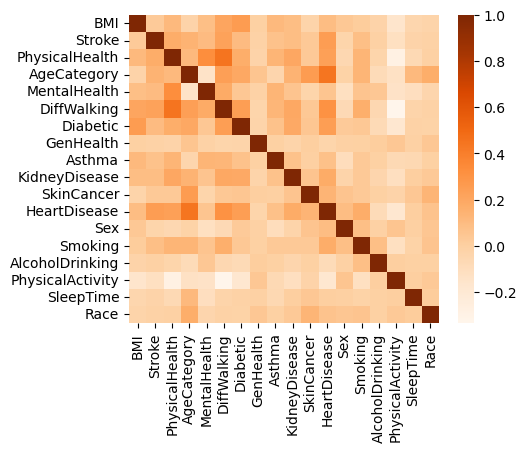

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 4))
correlation_matrix = heart_df.corr()
sns.heatmap(correlation_matrix, cmap="Oranges")

array([[<Axes: title={'center': 'Stroke'}>,
        <Axes: title={'center': 'PhysicalHealth'}>,
        <Axes: title={'center': 'AgeCategory'}>,
        <Axes: title={'center': 'MentalHealth'}>],
       [<Axes: title={'center': 'DiffWalking'}>,
        <Axes: title={'center': 'Diabetic'}>,
        <Axes: title={'center': 'GenHealth'}>,
        <Axes: title={'center': 'Asthma'}>],
       [<Axes: title={'center': 'KidneyDisease'}>,
        <Axes: title={'center': 'SkinCancer'}>,
        <Axes: title={'center': 'HeartDisease'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Smoking'}>,
        <Axes: title={'center': 'AlcoholDrinking'}>,
        <Axes: title={'center': 'PhysicalActivity'}>,
        <Axes: title={'center': 'SleepTime'}>],
       [<Axes: title={'center': 'Race'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

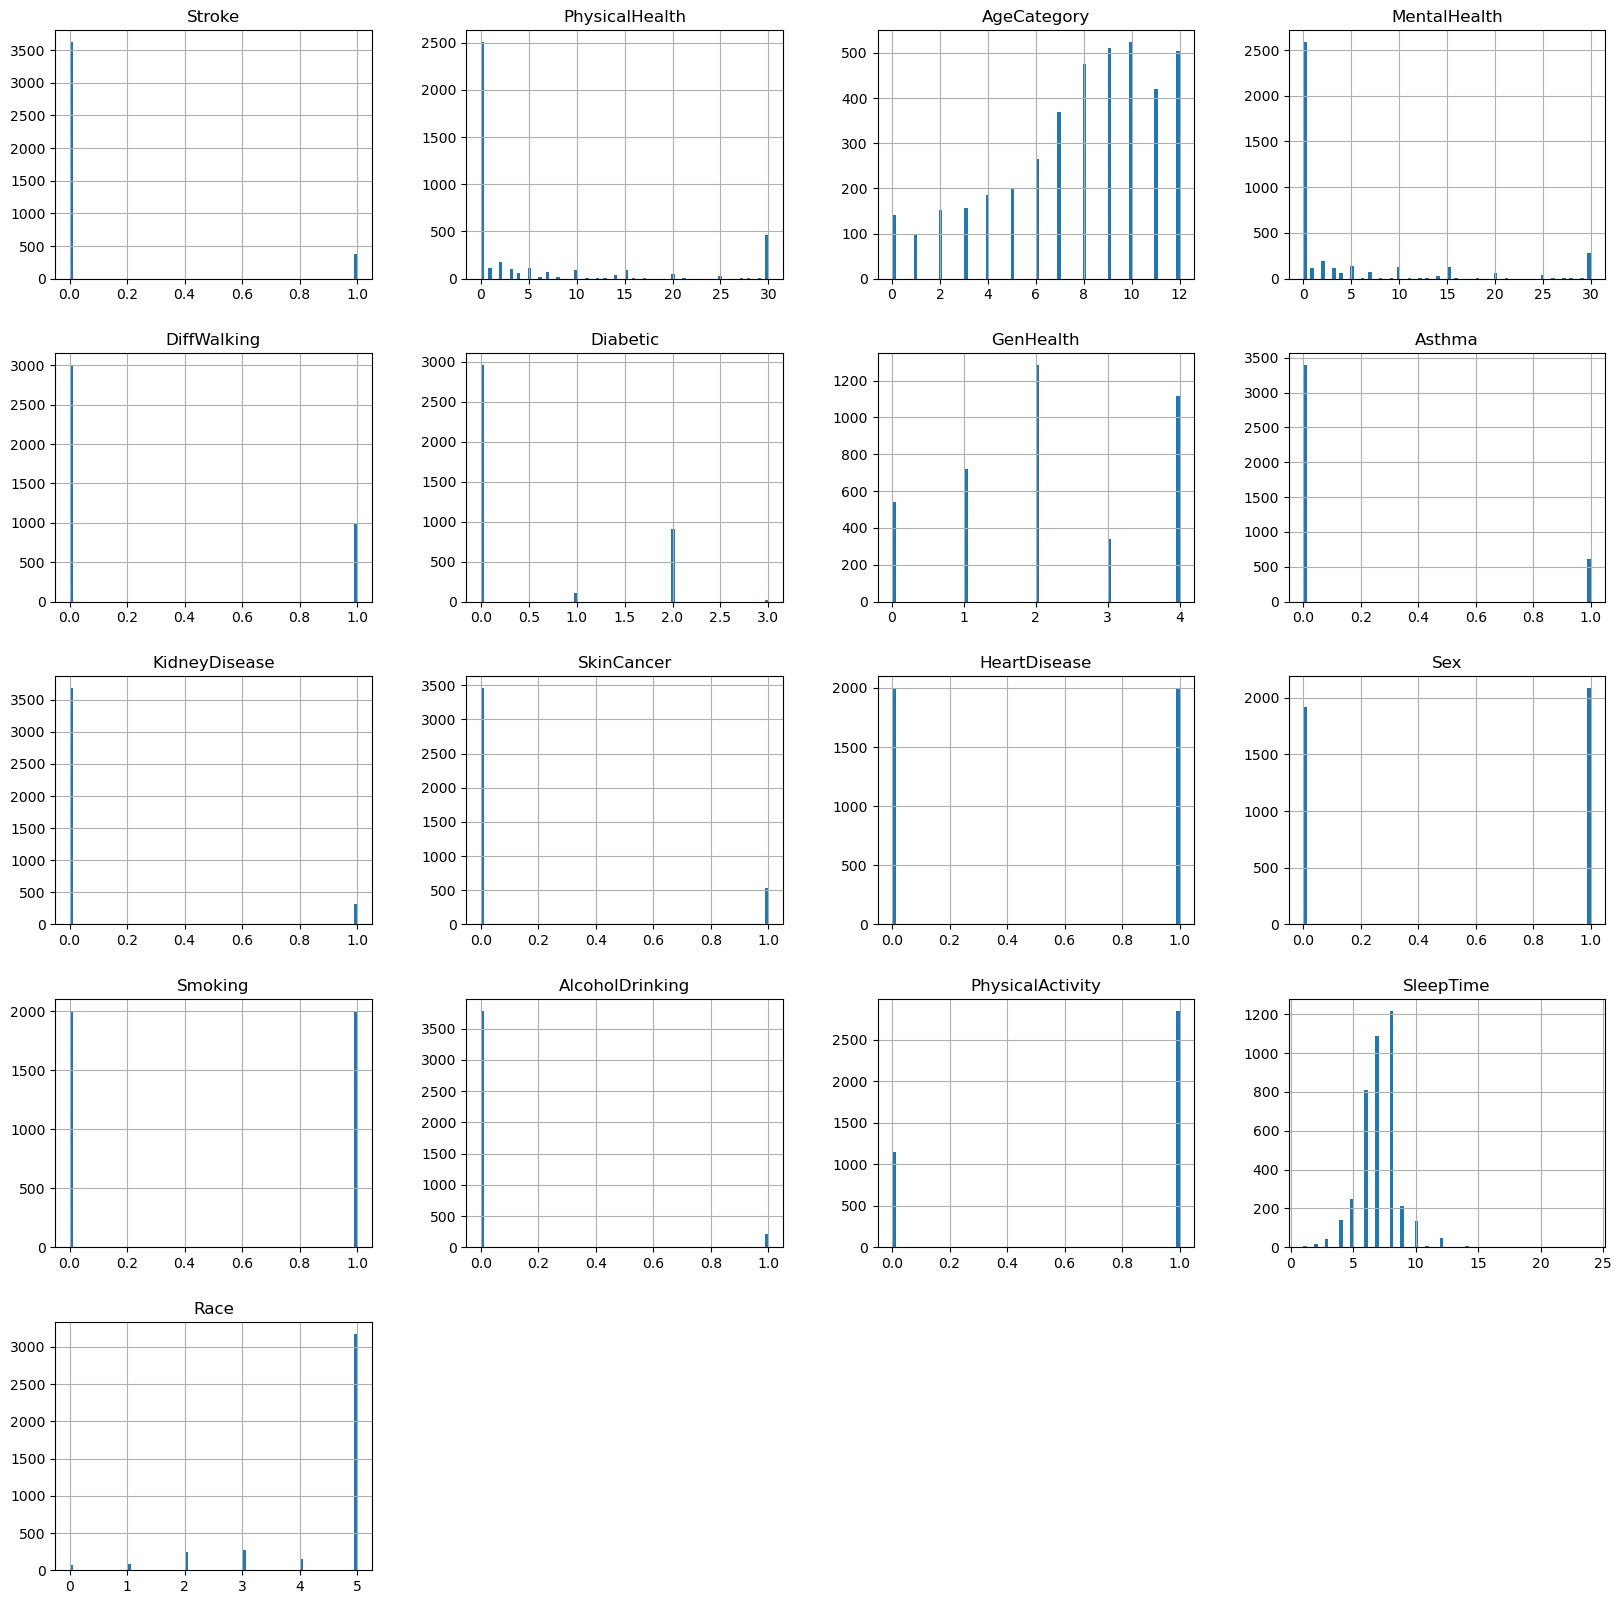

In [10]:
heart_df.iloc[:, 1:].hist(figsize=(20, 20), bins=80)

In [11]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'max_depth': [4, 6, 8, 10, 12],
    'min_samples_split': [6, 12, 18, 24],
    'min_samples_leaf': [4, 8, 16]
}

random_forest_classifier = RandomForestClassifier(n_estimators=100)

features, targets = heart_df.drop('HeartDisease', axis=1), heart_df.HeartDisease

X_train, X_test, y_train, y_test = train_test_split(features, targets, stratify=targets, test_size=0.3)

grid_random_forest = GridSearchCV(random_forest_classifier, param_grid=param_grid, cv=10, n_jobs=4)

grid_random_forest.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [4, 8, 16],
                         'min_samples_split': [6, 12, 18, 24]})

In [12]:
# DataFrame으로 변환
scores_df = pd.DataFrame(grid_random_forest.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score', 'split2_test_score']].sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
29,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.773571,1,0.835714,0.775000,0.721429
16,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.772857,2,0.842857,0.767857,0.732143
18,"{'max_depth': 6, 'min_samples_leaf': 8, 'min_s...",0.771786,3,0.828571,0.767857,0.728571
28,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.771071,4,0.817857,0.767857,0.739286
38,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.770714,5,0.817857,0.778571,0.735714
34,"{'max_depth': 8, 'min_samples_leaf': 16, 'min_...",0.770000,6,0.825000,0.767857,0.732143
14,"{'max_depth': 6, 'min_samples_leaf': 4, 'min_s...",0.769643,7,0.828571,0.771429,0.735714
22,"{'max_depth': 6, 'min_samples_leaf': 16, 'min_...",0.769643,8,0.832143,0.778571,0.721429
30,"{'max_depth': 8, 'min_samples_leaf': 8, 'min_s...",0.769286,9,0.821429,0.771429,0.717857
20,"{'max_depth': 6, 'min_samples_leaf': 16, 'min_...",0.769286,10,0.828571,0.764286,0.725000


In [13]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix, ConfusionMatrixDisplay, f1_score, roc_auc_score
# 타겟 데이터와 예측 객체를 전달받는다.
def get_evaluation(y_test, prediction, classifier=None, X_test=None):
#     오차 행렬
    confusion = confusion_matrix(y_test, prediction)
#     정확도
    accuracy = accuracy_score(y_test , prediction)
#     정밀도
    precision = precision_score(y_test , prediction)
#     재현율
    recall = recall_score(y_test , prediction)
#     F1 score
    f1 = f1_score(y_test, prediction)
#     ROC-AUC
#     roc_auc = roc_auc_score(y_test, prediction)

    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1:{3:.4f}'.format(accuracy , precision ,recall, f1))
    print("#" * 75)
    
    if classifier is not None and  X_test is not None:
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
        titles_options = [("Confusion matrix", None), ("Normalized confusion matrix", "true")]

        for (title, normalize), ax in zip(titles_options, axes.flatten()):
            disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax, cmap=plt.cm.Blues, normalize=normalize)
            disp.ax_.set_title(title)
        plt.show()

오차 행렬
[[435 165]
 [147 453]]
정확도: 0.7400, 정밀도: 0.7330, 재현율: 0.7550, F1:0.7438
###########################################################################


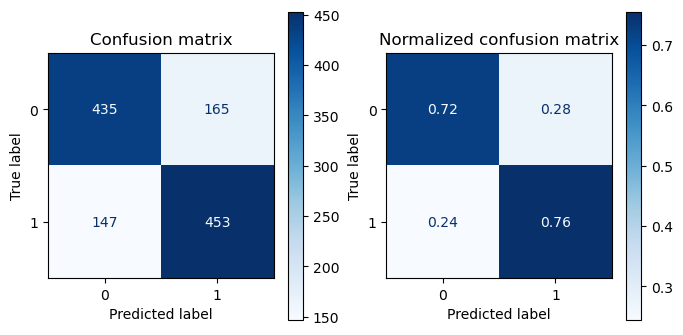

In [14]:
prediction = grid_random_forest.predict(X_test)
get_evaluation(y_test, prediction, grid_random_forest, X_test)